In [1]:
import torch
import numpy as np
import torchvision.models as models
import matplotlib.pyplot as plt
import pickle

In [2]:
inception = models.inception_v3(pretrained=True)

Let us look at AlexNet.

In [3]:
inception

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [4]:
aln_lin_1 = inception.AuxLogits.fc.weight[:].detach().numpy()
print("aln_lin_1", aln_lin_1.shape)
aln_lin_2 = inception.fc.weight[:].detach().numpy()
print("aln_lin_2", aln_lin_2.shape)

aln_lin_1 (1000, 768)
aln_lin_2 (1000, 2048)


In [5]:
from analyze_model import Plot2DMatrix, PlotVectorSizes

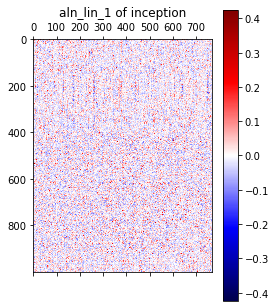

100%|██████████| 1000/1000 [00:01<00:00, 625.86it/s]


There are totally 0 zero elements in this matrix, percentage is 0.0


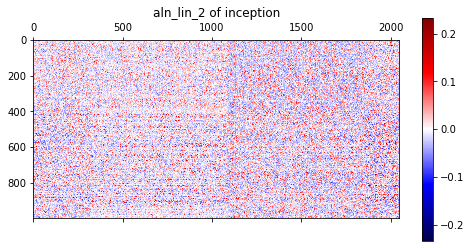

100%|██████████| 1000/1000 [00:04<00:00, 235.27it/s]

There are totally 0 zero elements in this matrix, percentage is 0.0


In [6]:
Plot2DMatrix(aln_lin_1, "aln_lin_1 of inception", color_map="seismic")
Plot2DMatrix(aln_lin_2, "aln_lin_2 of inception", color_map="seismic")


Now, let us do some pruning on the fully connected layer.

In [7]:
import torch.nn.utils.prune as prune

## global pruning
parameters_to_prune = (
    (inception.AuxLogits.fc, 'weight'),
    (inception.fc, 'weight'),
)

prune.global_unstructured(
    parameters_to_prune,
    pruning_method=prune.L1Unstructured,
    amount=0.8,
)

print(
    "Sparsity in fullyconnected_1.weight: {:.2f}%".format(
        100. * float(torch.sum(inception.AuxLogits.fc.weight == 0))
        / float(inception.AuxLogits.fc.weight.nelement())
    )
)
print(
    "Sparsity in fullyconnected_2.weight: {:.2f}%".format(
        100. * float(torch.sum(inception.fc.weight == 0))
        / float(inception.fc.weight.nelement())
    )
)

Sparsity in fullyconnected_1.weight: 71.04%
Sparsity in fullyconnected_2.weight: 83.36%


In [8]:
compressed_aln_lin_1 = inception.AuxLogits.fc.weight[:].detach().numpy()
print("compressed_aln_lin_1", compressed_aln_lin_1.shape)
compressed_aln_lin_2 = inception.fc.weight[:].detach().numpy()
print("compressed_aln_lin_2", compressed_aln_lin_2.shape)

compressed_aln_lin_1 (1000, 768)
compressed_aln_lin_2 (1000, 2048)


100%|██████████| 1000/1000 [00:04<00:00, 236.00it/s]


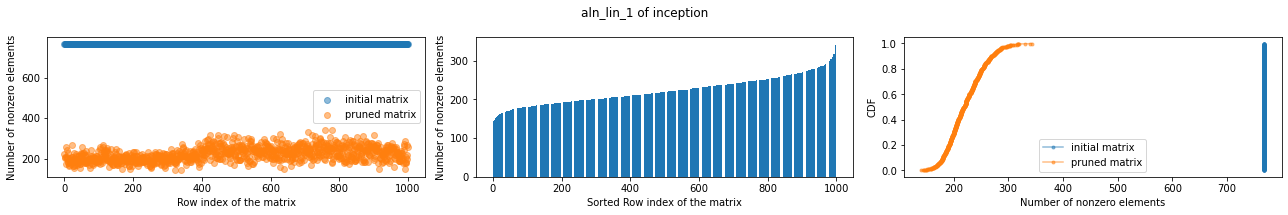

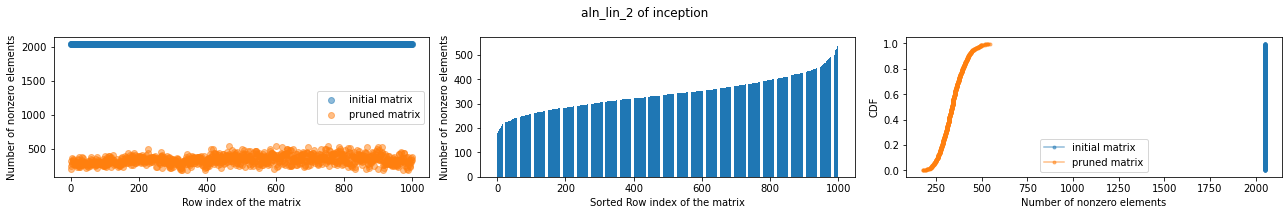

In [9]:
PlotVectorSizes(aln_lin_1, compressed_aln_lin_1, "aln_lin_1 of inception", plot_two_matrces=True)
PlotVectorSizes(aln_lin_2, compressed_aln_lin_2, "aln_lin_2 of inception", plot_two_matrces=True)


In [10]:
pickle.dump(aln_lin_1, open("../../data/saved_models/inception/aln_lin_1.p", "wb" ))
pickle.dump(aln_lin_2, open("../../data/saved_models/inception/aln_lin_2.p", "wb" ))

pickle.dump(compressed_aln_lin_1, open("../../data/saved_models/compressed_80_aln_lin_1.p", "wb" ))
pickle.dump(compressed_aln_lin_2, open("../../data/saved_models/compressed_80_aln_lin_2.p", "wb" ))

print("model saved in pickle files")

model saved in pickle files
